In [1]:
import sys
import os

# Step 1: Compute the path 3 levels up from the current working directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "../" * 3))

# Step 2: Add it to sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Step 3: Now you can import your module
import qf
import matplotlib.pyplot as plt
import numpy as np

/Users/PhilippSchmidt/miniforge3/envs/finrl-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "NFLX"]

data = qf.get_data(qf.DEFAULT_TICKERS, start="2024-01-01", end="2024-12-31", indicators="close")
data.head()

Ticker,AAPL,AMZN,BA,CAT,CSCO,CVX,DIS,GS,HON,IBM,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Price,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
2024-01-01,191.130325,151.940002,260.660004,288.550446,48.273945,139.728775,89.478874,372.928772,203.194153,155.762802,...,371.819366,105.500381,49.503410,141.233505,307.958893,185.559097,516.148315,257.513397,34.180378,51.660477
2024-01-02,184.290421,149.929993,251.759995,285.661652,48.264389,140.028534,89.895103,375.374542,202.506226,153.810410,...,366.707367,103.537491,48.149918,143.353851,301.057220,186.465042,528.766113,256.049469,35.250214,52.197887
2024-01-03,182.910507,148.470001,243.910004,277.454163,48.639950,142.698334,90.826660,369.081268,198.175110,152.477081,...,366.440430,101.098457,47.551144,142.486435,293.020111,186.348145,531.403381,255.169174,35.504074,52.201164
2024-01-04,180.587555,144.570007,244.940002,279.210815,48.225876,141.133942,89.746445,370.202698,198.533585,153.200882,...,363.810272,99.407661,47.979984,143.267120,292.032684,187.556030,534.726807,256.781372,35.694462,51.696522
2024-01-05,179.862839,145.240005,249.000000,281.972656,48.235500,140.890366,90.083397,373.576477,197.206161,151.581833,...,363.622437,99.193871,49.078568,142.081650,292.931183,188.072311,526.844482,256.860565,36.446980,51.352451


<Axes: title={'center': 'Close Price of All Tickers'}, xlabel='Date', ylabel='Price'>

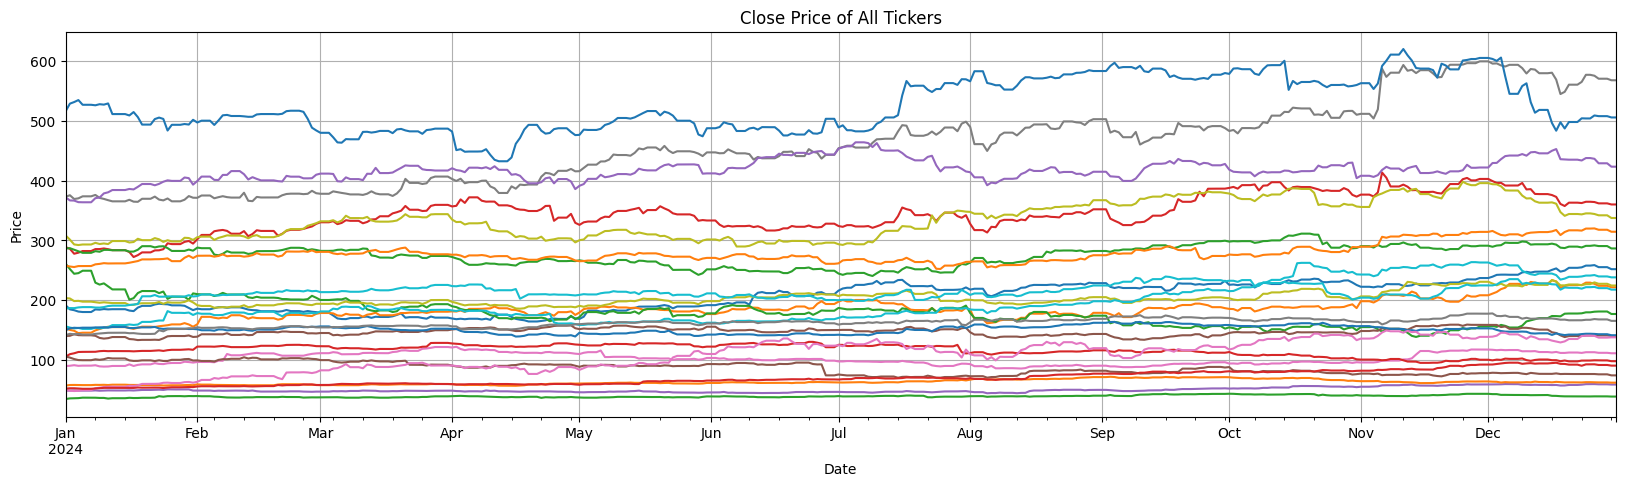

In [62]:
data.plot(figsize=(20, 5), title="Close Price of All Tickers", ylabel="Price", xlabel="Date", grid=True, legend=False)

In [63]:
# Calculate log returns
returns = data.pct_change().apply(lambda x: np.log(1 + x))
returns.head()

Ticker,AAPL,AMZN,BA,CAT,CSCO,CVX,DIS,GS,HON,IBM,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Price,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
2024-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,-0.036443,-0.013317,-0.034741,-0.010062,-0.000198,0.002143,0.004641,0.006537,-0.003391,-0.012614,...,-0.013844,-0.018781,-0.027722,0.014901,-0.022666,0.004870,0.024152,-0.005701,0.030820,0.010349
2024-01-03,-0.007516,-0.009786,-0.031677,-0.029152,0.007751,0.018887,0.010309,-0.016907,-0.021620,-0.008706,...,-0.000728,-0.023839,-0.012514,-0.006069,-0.027059,-0.000627,0.004975,-0.003444,0.007176,0.000063
2024-01-04,-0.012781,-0.026619,0.004214,0.006311,-0.008549,-0.011023,-0.011964,0.003034,0.001807,0.004736,...,-0.007203,-0.016866,0.008978,0.005464,-0.003376,0.006461,0.006235,0.006298,0.005348,-0.009714
2024-01-05,-0.004021,0.004624,0.016440,0.009843,0.000200,-0.001727,0.003747,0.009072,-0.006709,-0.010624,...,-0.000516,-0.002153,0.022639,-0.008309,0.003072,0.002749,-0.014851,0.000308,0.020863,-0.006678


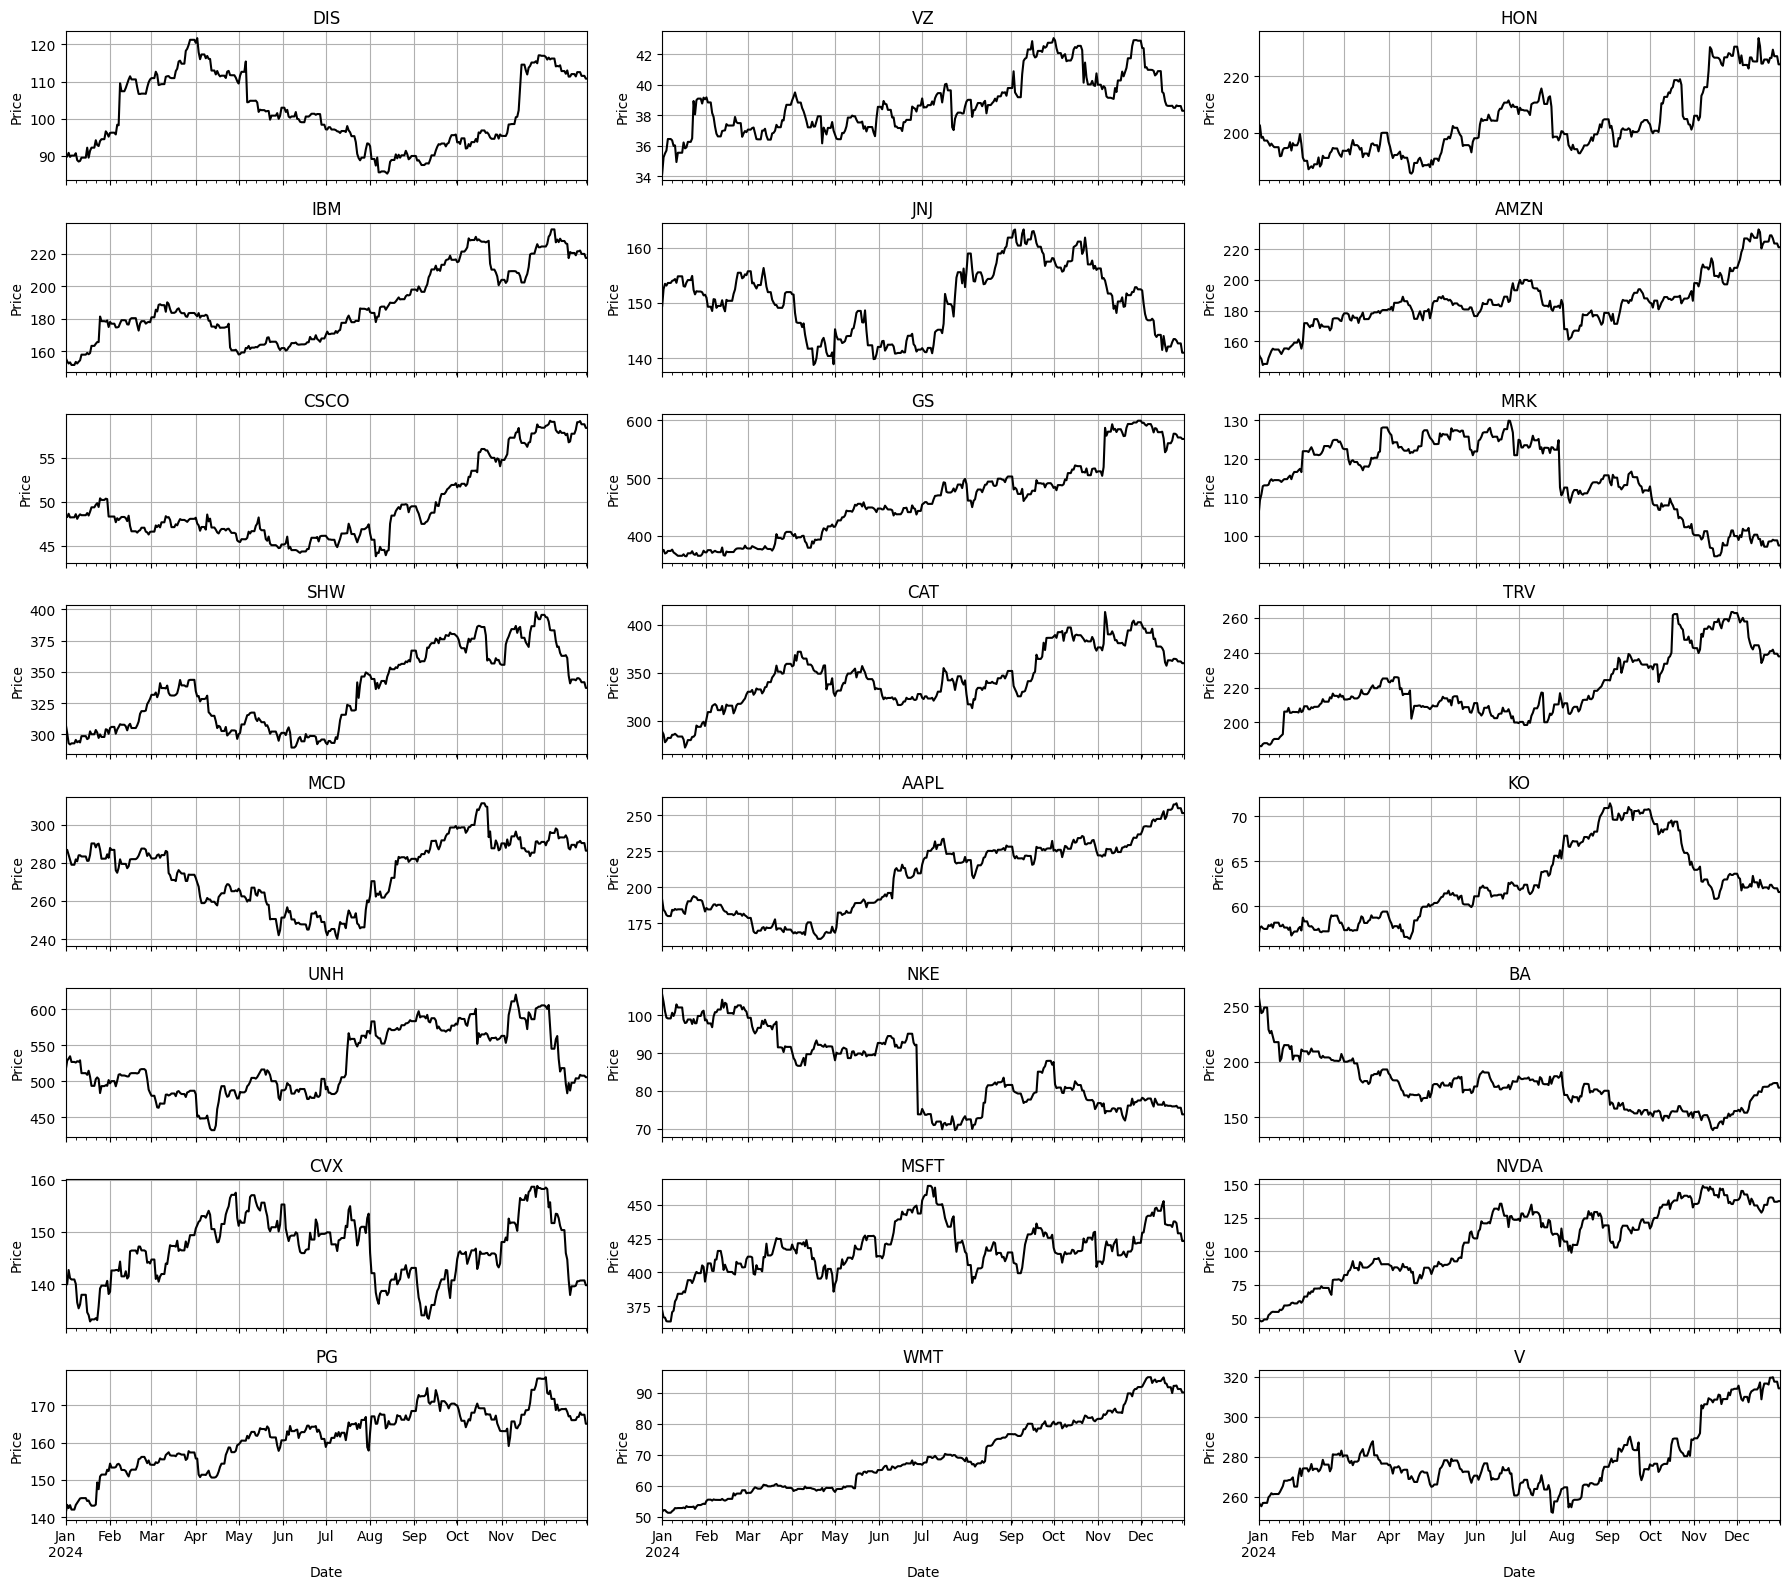

In [64]:
# Make a stacked subplot with three columns and n rows equal to the number of tickers/ three
def plot_grid(data, n_cols=3, figsize=(6, 2)):
    n = int(np.round(len(qf.DEFAULT_TICKERS)/n_cols))
    fig, axes = plt.subplots(nrows=n, ncols=n_cols, figsize=(figsize[0]*n_cols, figsize[1]*n), sharex=True)

    for i, ticker in enumerate(qf.DEFAULT_TICKERS):
        ax = axes[i // n_cols, i % n_cols]
        data[ticker].plot(ax=ax, title=ticker, ylabel="Price", xlabel="Date", grid=True, color=qf.DEFAULT_SINGLE_LINE_COLOR)
        ax.legend().remove()

    plt.tight_layout()
    plt.show()

plot_grid(data)

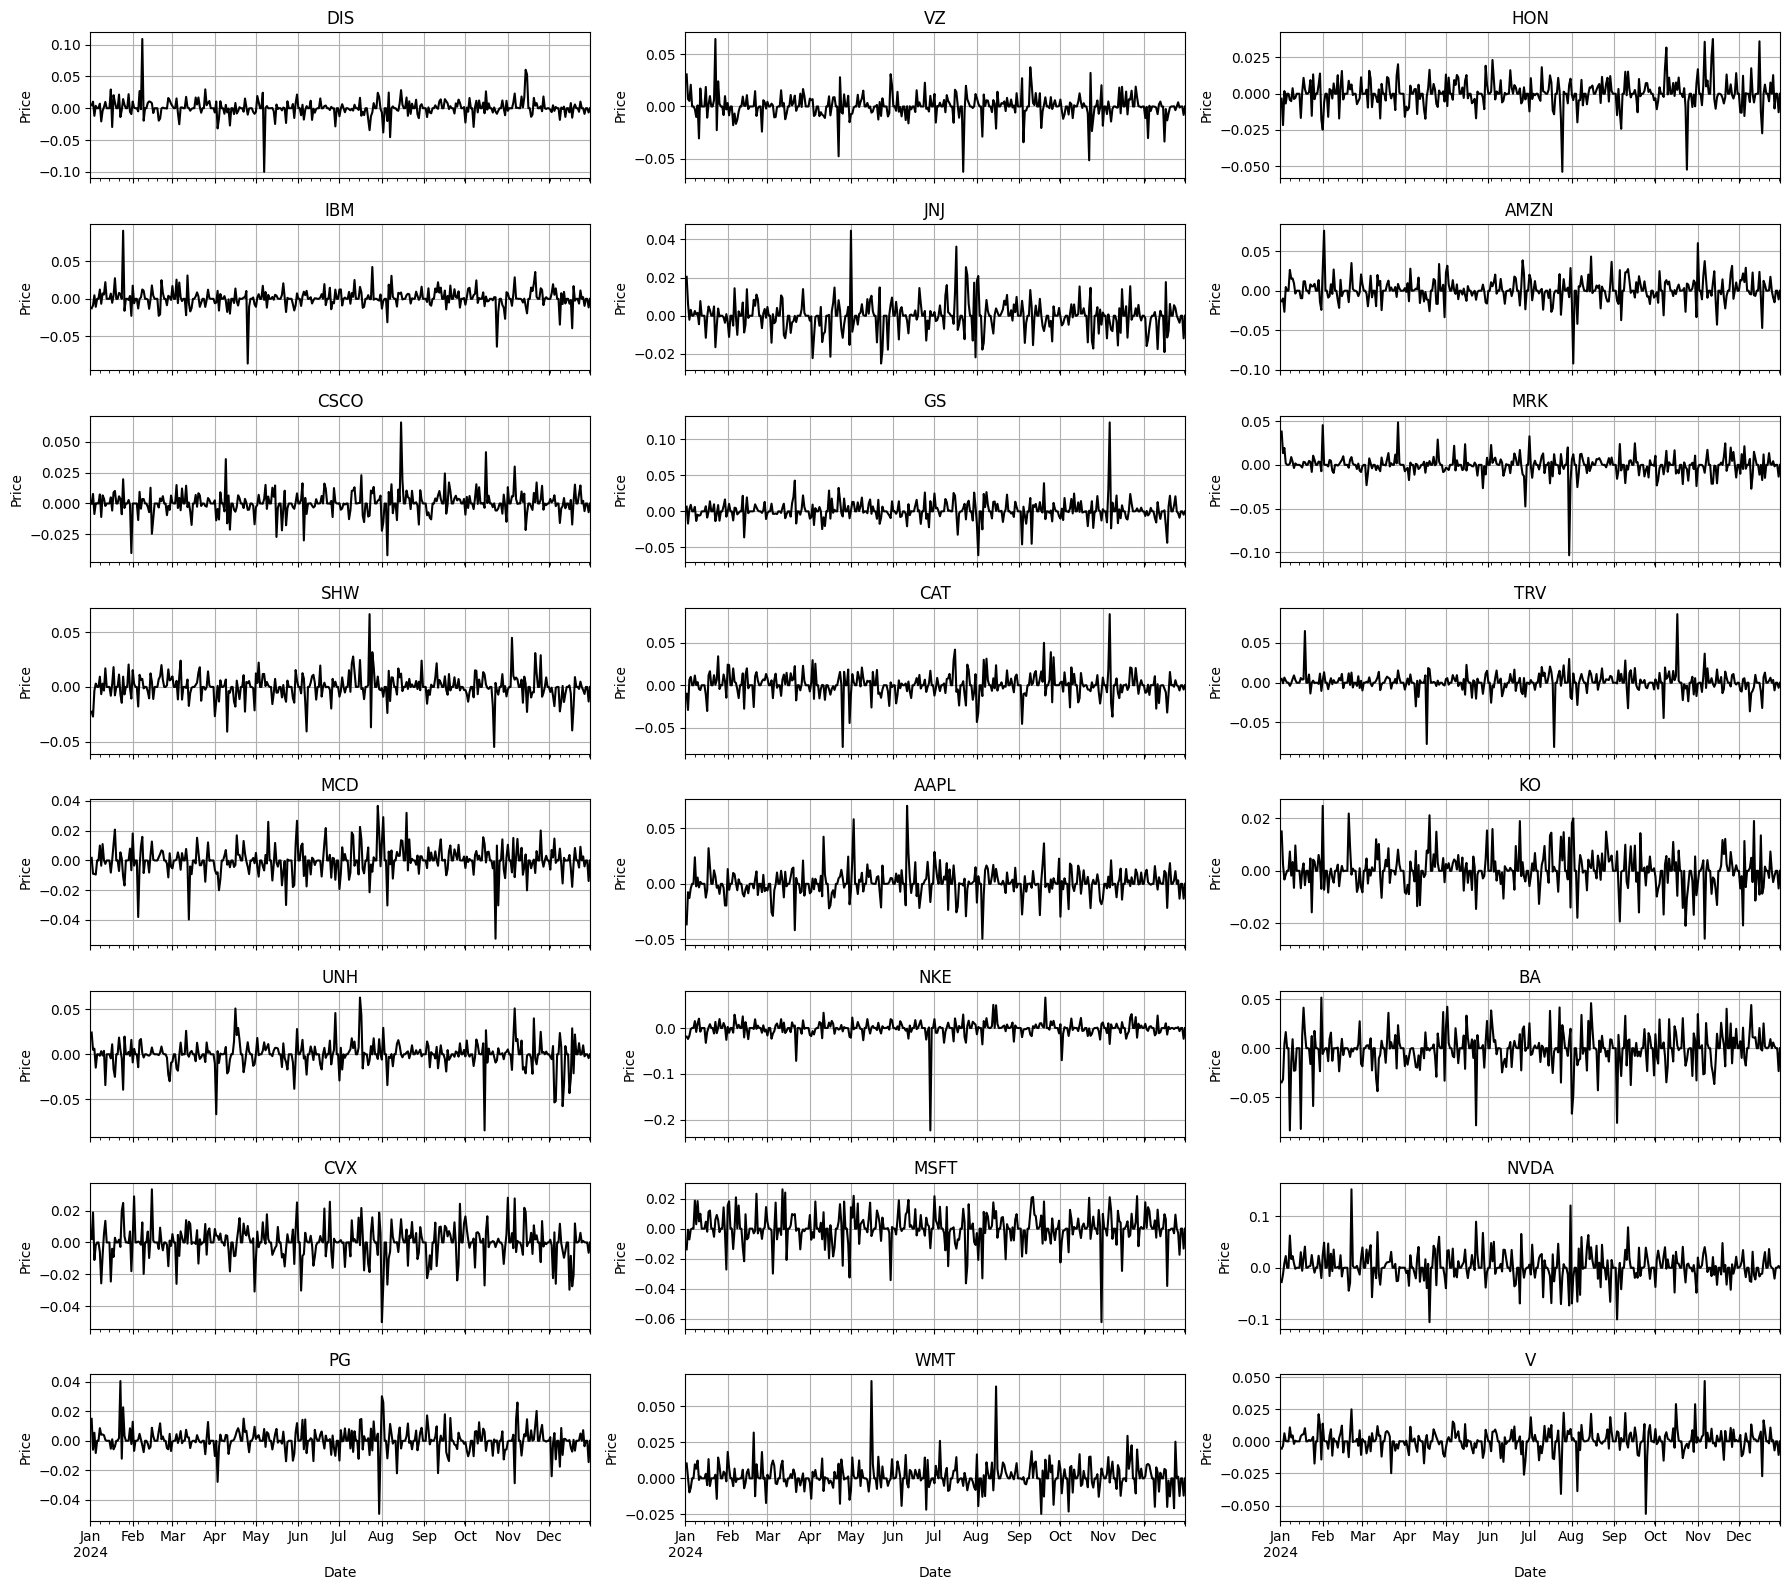

In [65]:
plot_grid(returns, n_cols=3)

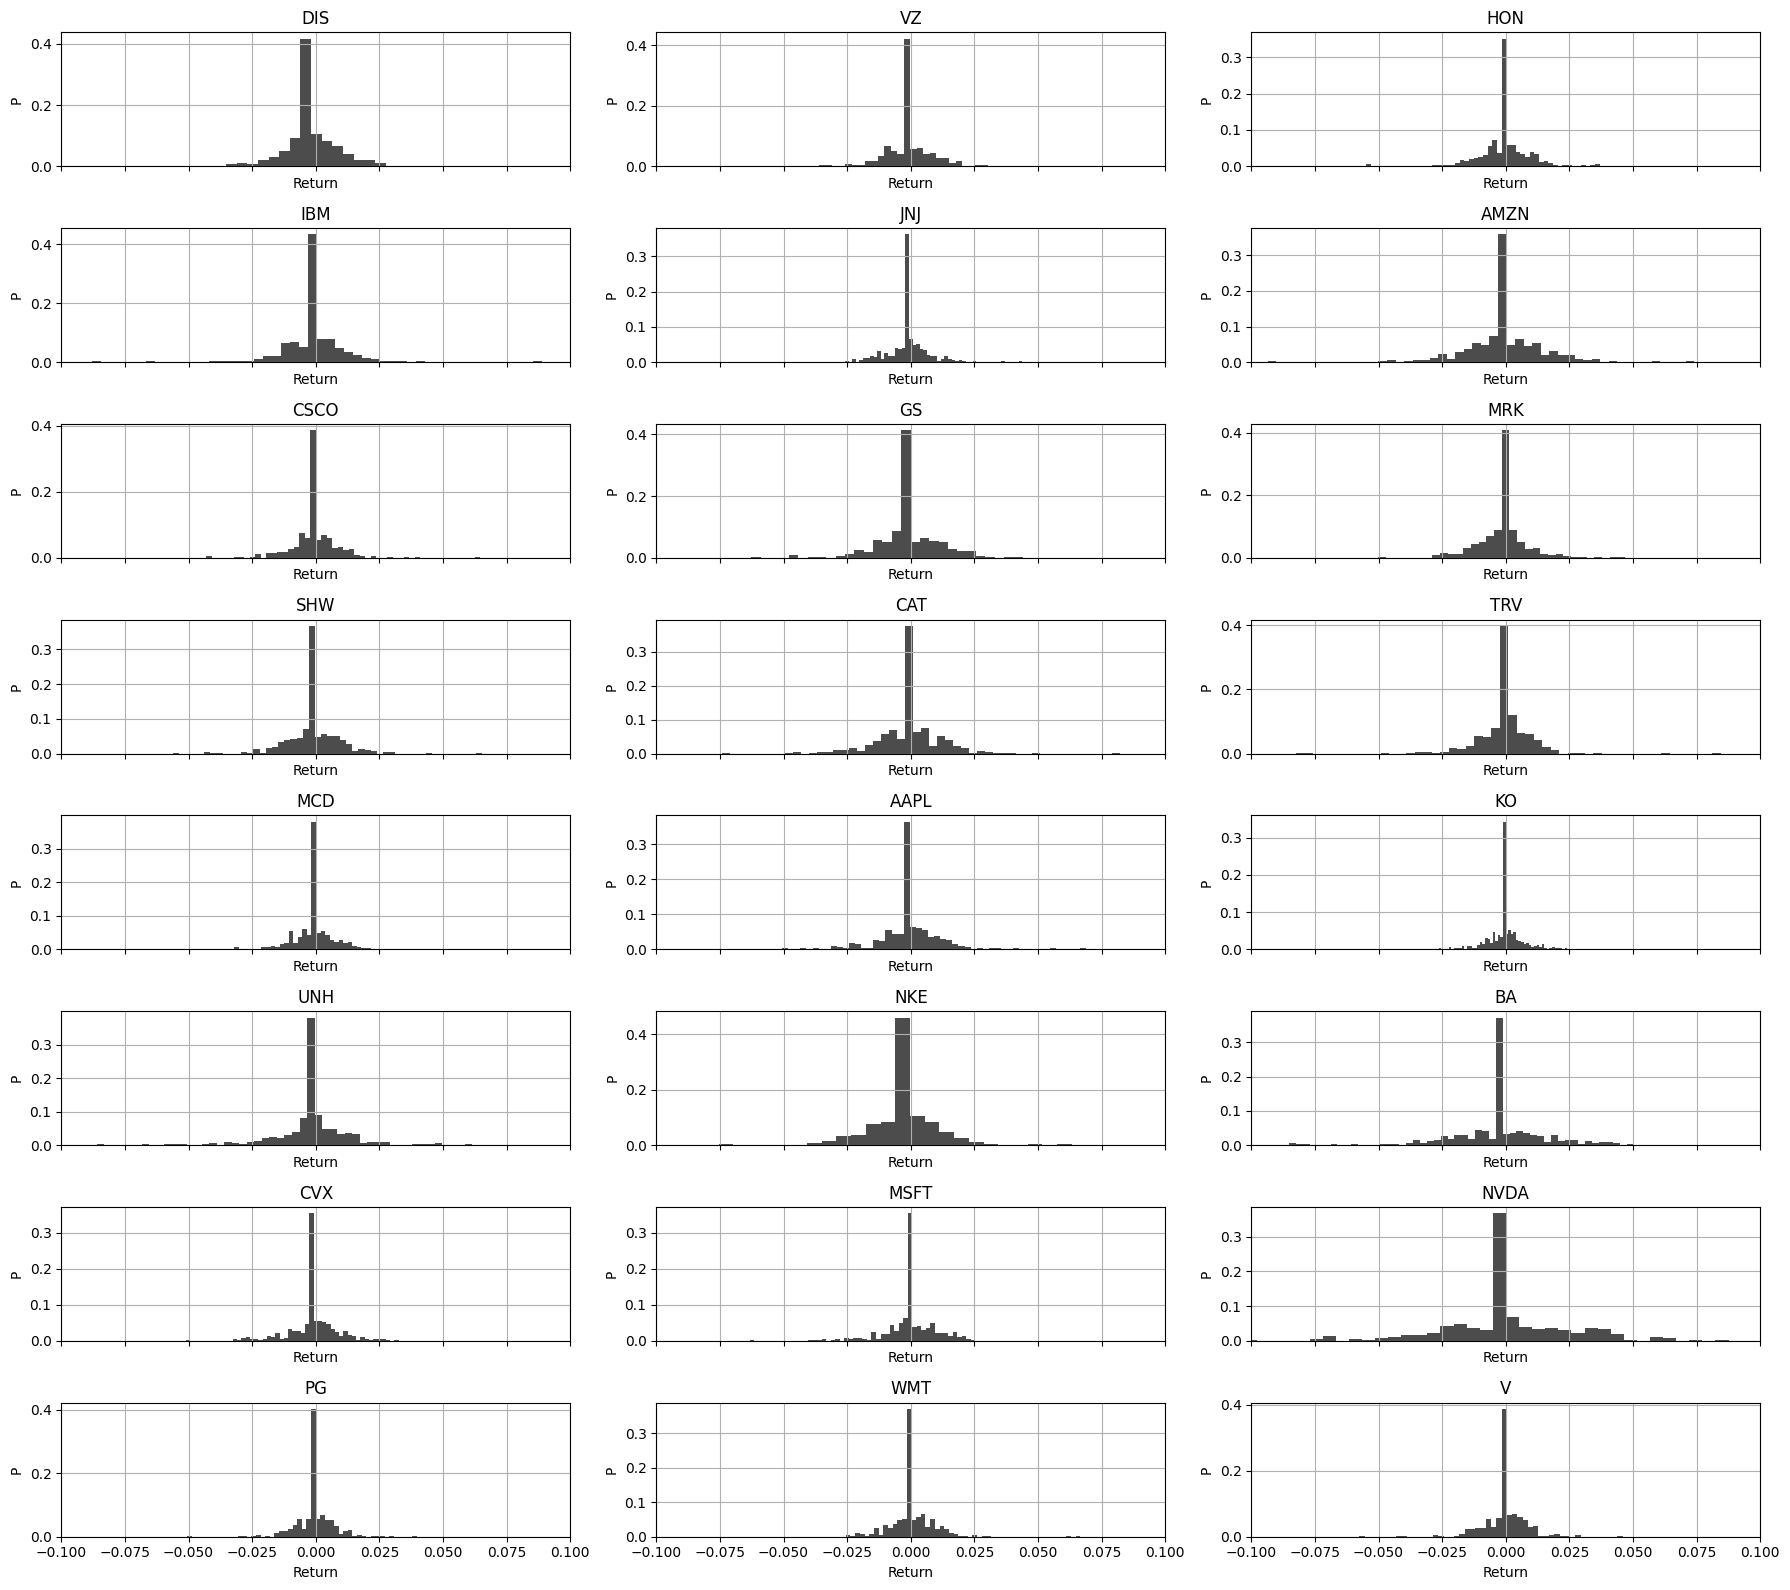

In [66]:
def plot_hist_grid(data, n_cols=3, bins=200, figsize=(6, 2), log_y_scale=False, y_limit_bin = 1):
    import matplotlib.pyplot as plt
    import numpy as np

    n = int(np.ceil(len(qf.DEFAULT_TICKERS) / n_cols))
    fig, axes = plt.subplots(nrows=n, ncols=n_cols, figsize=(figsize[0]*n_cols, figsize[1]*n), sharex=True)

    # Flatten axes in case of 1D
    axes = axes.flatten()

    for i, ticker in enumerate(qf.DEFAULT_TICKERS):
        ax = axes[i]

        # Calculate the np.histogram
        hist, bin_edges = np.histogram(data[ticker].dropna(), bins=bins, density=True)



        # Normalize hist
        hist = hist / hist.sum()

        # Plot the histogram
        ax.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), color=qf.DEFAULT_SINGLE_LINE_COLOR, alpha=0.7)
        
        ax.set_title(ticker)
        ax.set_ylabel("P")
        ax.set_xlabel("Return")
        ax.grid(True)
        if log_y_scale:
            ax.set_yscale('log')


        ax.set_xlim(-0.1, 0.1)


    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_hist_grid(returns, n_cols=3, bins=50, figsize=(6, 2), log_y_scale=False)


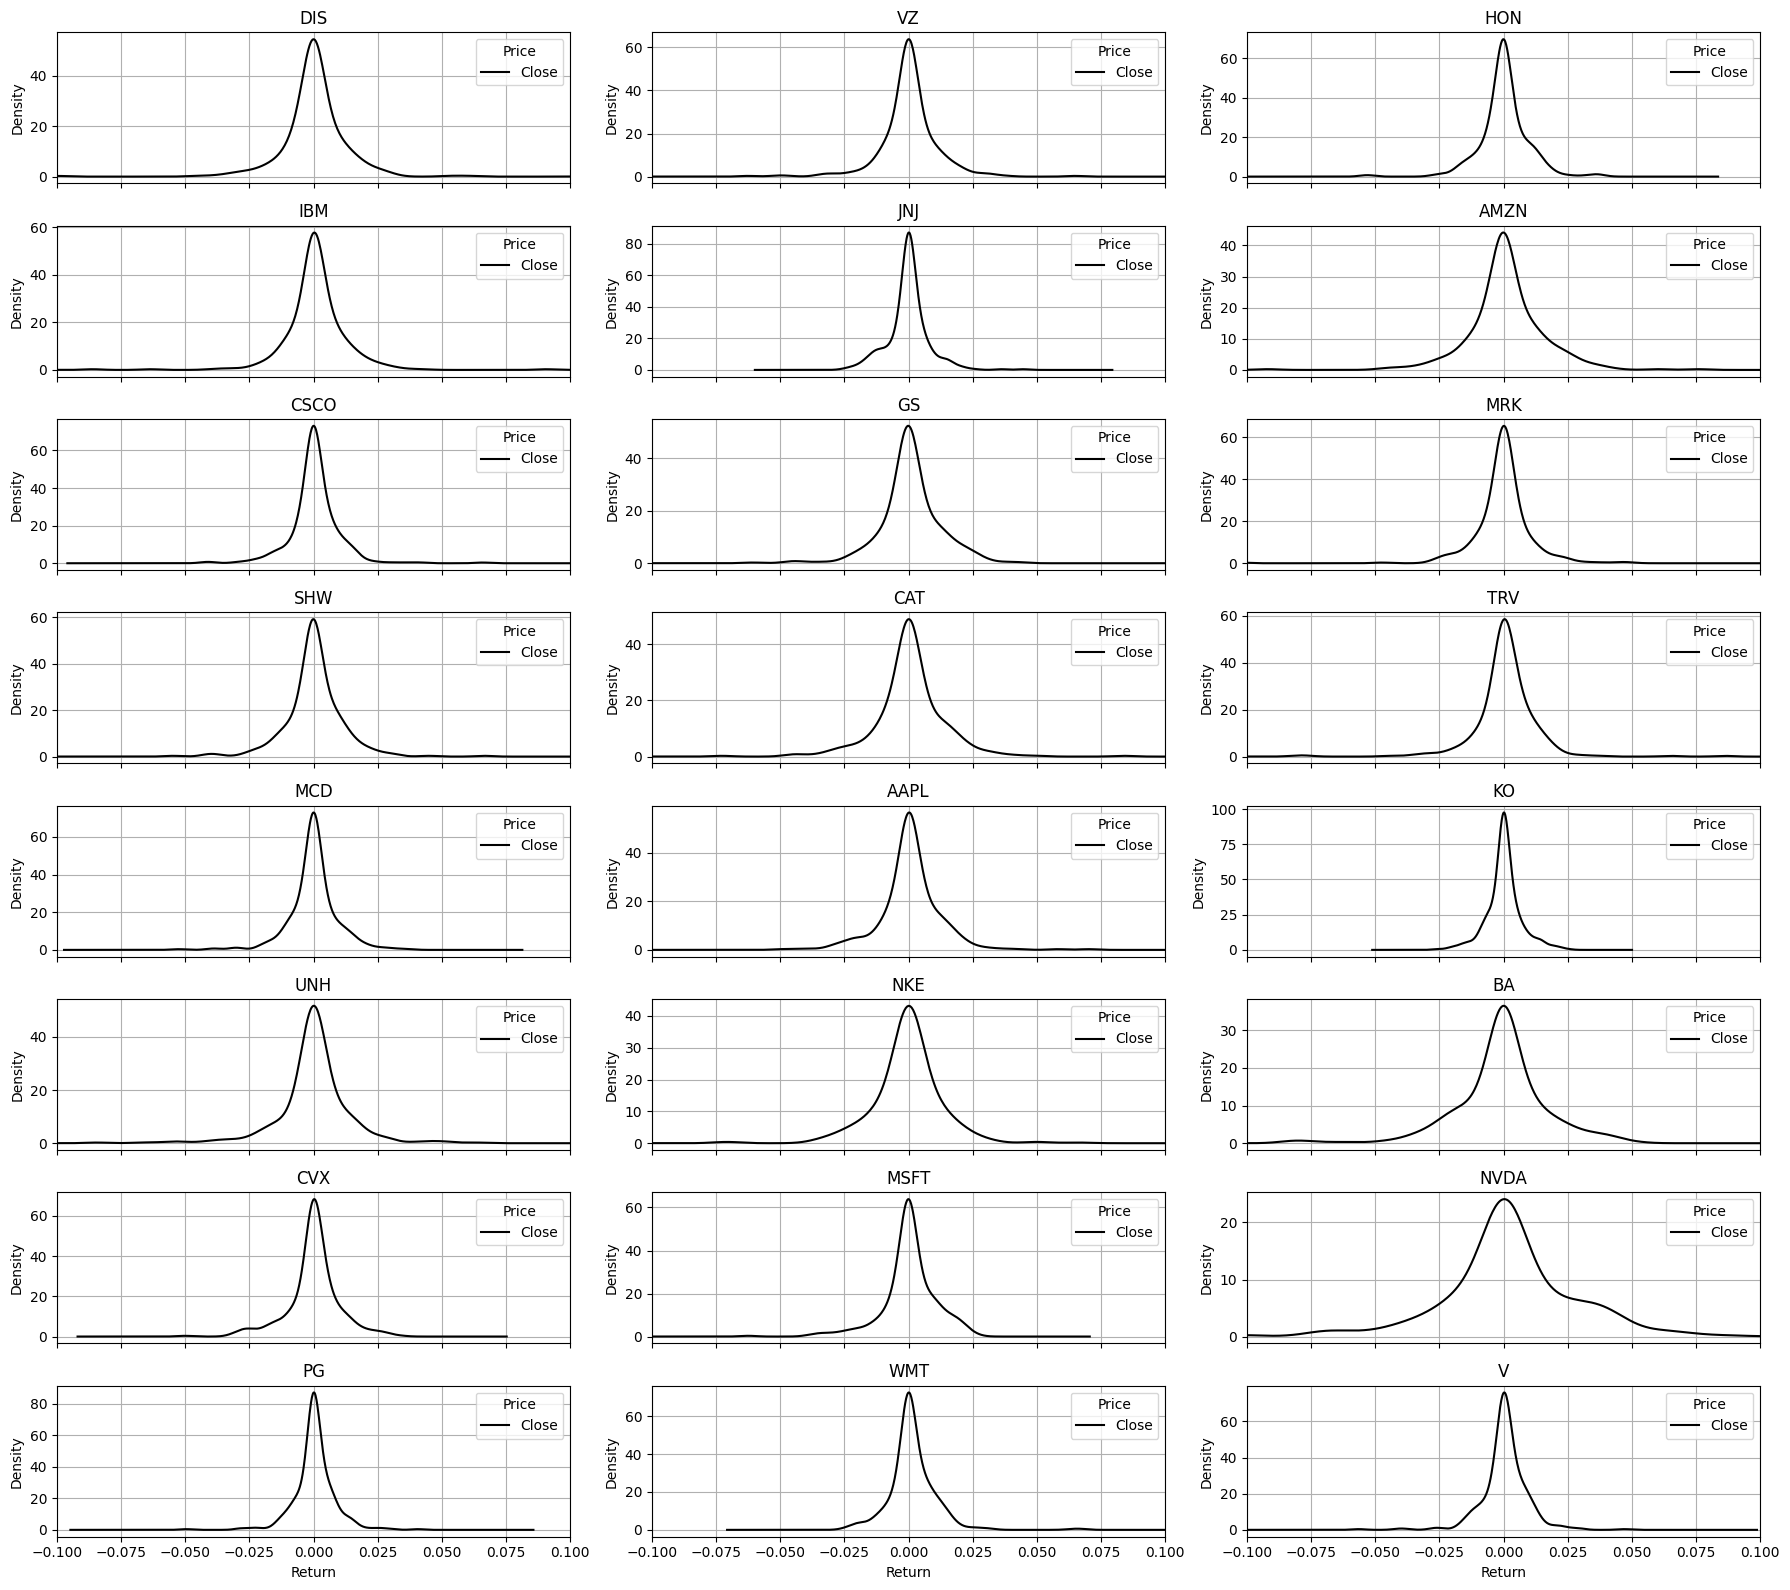

In [67]:
def plot_distribution_grid(data, n_cols=3, bins=200, figsize=(6, 2)):
    n = int(np.round(len(qf.DEFAULT_TICKERS)/n_cols))
    fig, axes = plt.subplots(nrows=n, ncols=n_cols, figsize=(figsize[0]*n_cols, figsize[1]*n), sharex=True)

    for i, ticker in enumerate(qf.DEFAULT_TICKERS):
        ax = axes[i // n_cols, i % n_cols]
        data[ticker].plot.kde(ax=ax, color=qf.DEFAULT_SINGLE_LINE_COLOR)
        ax.set_title(ticker)
        ax.set_ylabel("Density")
        ax.set_xlabel("Return")
        ax.grid(True)

        # Set limits for better visibility
        ax.set_xlim(-0.1, 0.1)
        #ax.set_ylim(0, )

    plt.tight_layout()
    plt.show()

plot_distribution_grid(returns)

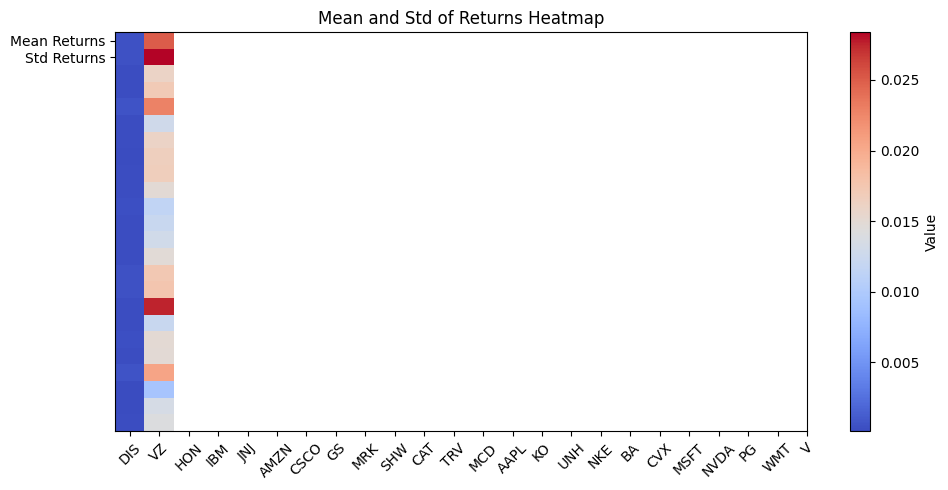

In [27]:
# Calculate the mean and standard deviation of the returns plot them in a heatmap
mean_returns = returns.mean()
std_returns = returns.std()
heatmap_data = np.vstack([mean_returns, std_returns]).T

plt.figure(figsize=(10, 5))
plt.imshow(heatmap_data, aspect='auto', cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Value')
plt.xticks(ticks=np.arange(len(qf.DEFAULT_TICKERS)), labels=qf.DEFAULT_TICKERS, rotation=45)
plt.yticks(ticks=[0, 1], labels=['Mean Returns', 'Std Returns'])
plt.title('Mean and Std of Returns Heatmap')
plt.tight_layout()
plt.show()  
